
# 7.1 Stack
- 데이터가 입력되면 입력되는 순서대로 쌓고, 나중에 들어온 것부터 먼저 사용한다.
- Last In First Out
- 데이터를 넣는 것을 `push`, 꺼내는 것을 `pop`이라고 한다.
- 끝이 막혔다!!!
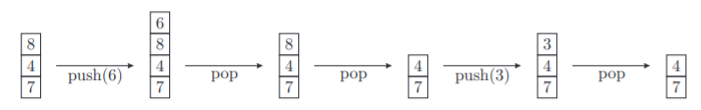    

In [ ]:
# 예제 : push/pop function - O(1)

stack = [0]*N
size = 0
def push(x):
    global size
    stack[size] = x   # x=6, N=5일때, stack = [0,0,0,0,0] -> [6,0,0,0,0]
    size += 1         # 
    
def pop():
    global size
    size -= -1
    return stack[size]

In [5]:
# 더 쉽게
def push(item):
    stack.append(item)
    
def pop():
    return stack.pop()  # 맨마지막 인덱스부터 뺀다.

stack = []  # 빈바구니 만들고 append하면서 데이터 추가하고
push(1)
push(2)
push(3)
print(stack)

while stack:  # stack이 빈리스트가 될 때까지
    print('pop',pop())

[1, 2, 3]
pop 3
pop 2
pop 1


# 7.2 Queue
- 데이터가 입력되면 입력되는 순서대로 쌓고, 먼저들어온 것부터 사용하는 구조이다.
- First In First Out
- 데이터 넣는 것을 `enqueue`, 데이터 꺼내는 것을 `dequeue`라고 한다.
- 끝이 뚫려있다. 그대로 통과~ 영화관 매표소 줄처럼
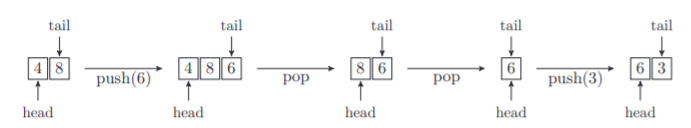

In [6]:

def push(item):
    stack.append(item)
    
def get():
    return stack.pop(0)  # 맨 처음 것 가져온다.

stack = []  # 빈바구니 만들고 append하면서 데이터 추가하고
push(1)
push(2)
push(3)
print(stack)

while stack:  # stack이 빈리스트가 될 때까지
    print('pop',pop())

[1, 2, 3]
pop 3
pop 2
pop 1


## 큐 추가 덱 및 기타 큐(thx to Minsu)
- append()와 pop() 메서드를 사용해서 리스트를 큐로 사용할 수 있지만, 
리스트 왼쪽에 삽입 또는 삭제 할 경우 **전체 리스트를 이동시켜야 하므로 처리 부담이 크다**
- 덱(deque)클래스는 큐의 양쪽 어디에서든 빠르게 삽입 삭제가 가능한 thread-safe 양방향 큐다.
- 덱은 최대 길이를 설정해서 제한된 항목만 유지할 수도 있어서 꽉찬 경우 새로운 항목을 삽입하면 반대쪽 항목이 제거된다.

In [12]:
from collections import deque
# 선택적 인수 maxlen은 덱 객체가 수용할 수 있는 최대 항목 수를 설정한다.
# 덱 객체를 생성할 때 읽기 전용 속성인 maxlen을 설정한다.
li = deque(range(10), maxlen=10)
li

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# 양수 인수를 받으면 오른쪽 끝에 있는 항목을 지정한 개수만큼 왼쪽 끝으로 이동
li.rotate(3)
li

deque([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [11]:
# 가득찬 덱에 항목을 추가하면 반대쪽 항목을 삭제한다.
li.appendleft(-1)
li

deque([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
li.extend([11, 22, 33])  # 맨끝에 추가되는 만큼 앞에 값은 삭제됨 10개 맞춰주려고

In [14]:
li

deque([3, 4, 5, 6, 7, 8, 9, 11, 22, 33])

In [15]:
# extendleft(iter)는 iter 인수에서 생성되는 항목을 덱의 왼쪽에 하나씩 차례대로 추가한다,
# 그래서 항목이 역순으로 추가된 것임.
li.extendleft([10, 20, 30, 40])
li

deque([40, 30, 20, 10, 3, 4, 5, 6, 7, 8])

# 문제풀자
# 1. Bracket

A string S consisting of N characters is considered to be properly nested if any of the following conditions is true:  

S is empty;  
S has the form "(U)" or "[U]" or "{U}" where U is a properly nested string;  
S has the form "VW" where V and W are properly nested strings.  
For example, the string "{[()()]}" is properly nested but "([)()]" is not.  

Write a function:  

    def solution(S)

that, given a string S consisting of N characters, returns 1 if S is properly nested and 0 otherwise.  

For example, given S = "{[()()]}", the function should return 1 and given S = "([)()]", the function should return 0, as explained above.  

Write an efficient algorithm for the following assumptions:  

N is an integer within the range [0..200,000];
string S consists only of the following characters: "(", "{", "[", "]", "}" and/or ")".

In [ ]:
properly nested string : 중첩된 문자열

In [98]:
S = '{[()()]}'

In [111]:
stack = []
for char in S:
    # 일단 여는 괄호를 스택에 담는다.
    if char in ['{','[','(']:
        stack.append(char)
        
    # char에 닫는 괄호가 나오면 다음과 같은 조건을 건다.     
    else:
        if len(stack) == 0:
            print( 0)
        item = stack.pop()  # '('->'['->'{' 이 순서대로 나올 것.
#         print(item)
        if item == '(' and char == ')':
           print(1)
        elif item =='[' and char == ']':
            print(1)
        elif item =='{' and char == '}':
            print(1)
           
# 스택에서 다 꺼내서 비교했으니까 스택에 하나라도 남아있으면 0,
# 모든 조건을 만족하지 못하는 것도 0 리턴
print(0 if len(stack) !=0 else 1)
        
            

1
1
1
1
1


In [115]:
def solution(S):
    stack = []
    for char in S:
        # 일단 여는 괄호를 스택에 담는다.
        if char in ['{','[','(']:
            stack.append(char)

        # char에 닫는 괄호가 나오면 다음과 같은 조건을 건다.     
        else:
            if len(stack) == 0:
                return 0
            item = stack.pop()  # '('->'['->'{' 이 순서대로 나올 것.
    #         print(item)
            if item == '(' and char != ')':
                return 0
            elif item =='[' and char != ']':
                return 0
            elif item =='{' and char != '}':
                return 0
    
    # 스택에서 다 꺼내서 비교했으니까 남아있으면 0, 
    # 그 외 조건이 만족하면 전부 1
    return 0 if len(stack)>0 else 1

In [116]:
solution("([)()]")

0

https://app.codility.com/demo/results/trainingKJXU3N-K4X/


In [ ]:
# 이런 방법도 있다!
def solution(S):
    nested = {'(': 1, ')': -1, '{': 2, '}': -2, '[': 3, ']': -3}  
    nest = []
    for s in S:
        if nested[s] > 0:
            nest.append(s)
        if nested[s] < 0:
            if len(nest) == 0: 
                return 0
            t = nest.pop()
            if abs(nested[t]) != abs(nested[s]):
                return 0

    return 0 if len(nest) !=0 else 1

In [133]:
nested = {'(': 1, ')': -1, '{': 2, '}': -2, '[': 3, ']': -3}  
nest = []
for s in S:
    if nested[s] > 0:   # 여는 괄호가 오면 스택에 쌓는다. 
#         print(nested[s]) # 2 ->3 ->1 ->1
        nest.append(s)
#         print(nest)    # ['{', '[', '(', '(']
        
    # 닫는 괄호 올때     
    if nested[s] < 0:
#         print(nest)
#         if len(nest) == 0: # 여는 괄호 없으면 0 리턴
#             return 0
        t = nest.pop()  # ( -> ( -> [ -> { 이렇게 나옴
#         print(nest, t)
#         print(nested[t], nested[s]) 
        # 스택에서 꺼낸 1,1,3,2 == (,(,[,{ 과 S에서 꺼낸 -1,-1-3,-2==),),],}이 다르면 0리턴
        if abs(nested[t]) != abs(nested[s]):
            print(0)

# stack에서 다꺼내와서 비교했으니까 남는게 있다면 짝이 안맞는 거니까 0
# 다 꺼내와서 비교하면서 위의 조건 만족하면 1
print(0 if len(nest)!=0 else 1) 

1


# 문제 2 Fish
You are given two non-empty arrays A and B consisting of N integers. Arrays A and B represent N voracious fish in a river, ordered downstream along the flow of the river.  

The fish are numbered from 0 to N − 1. If P and Q are two fish and P < Q, then fish P is initially upstream of fish Q. Initially, each fish has a unique position.  

Fish number P is represented by A[P] and B[P]. Array A contains the sizes of the fish. All its elements are unique. Array B contains the directions of the fish. It contains only 0s and/or 1s, where:  

- 0 represents a fish flowing upstream,
- 1 represents a fish flowing downstream.

If two fish move in opposite directions and there are no other (living) fish between them, they will eventually meet each other. Then only one fish can stay alive − the larger fish eats the smaller one. More precisely, we say that two fish P and Q meet each other when P < Q, B[P] = 1 and B[Q] = 0, and there are no living fish between them. After they meet:  

- If A[P] > A[Q] then P eats Q, and P will still be flowing downstream,
- If A[Q] > A[P] then Q eats P, and Q will still be flowing upstream.

We assume that all the fish are flowing at the same speed. That is, fish moving in the same direction never meet. The goal is to calculate the number of fish that will stay alive.  

For example, consider arrays A and B such that:  

  A[0] = 4    B[0] = 0  
  A[1] = 3    B[1] = 1  
  A[2] = 2    B[2] = 0  
  A[3] = 1    B[3] = 0  
  A[4] = 5    B[4] = 0  
  
Initially all the fish are alive and all except fish number 1 are moving upstream. Fish number 1 meets fish number 2 and eats it, then it meets fish number 3 and eats it too. Finally, it meets fish number 4 and is eaten by it. The remaining two fish, number 0 and 4, never meet and therefore stay alive.  

Write a function:  

    def solution(A, B)

that, given two non-empty arrays A and B consisting of N integers, returns the number of fish that will stay alive.  

For example, given the arrays shown above, the function should return 2, as explained above.  

Write an efficient algorithm for the following assumptions:  

N is an integer within the range [1..100,000];
each element of array A is an integer within the range [0..1,000,000,000];
each element of array B is an integer that can have one of the following values: 0, 1;
the elements of A are all distinct.

In [153]:
A = [4,3,2,1,5]
B = [0,1,0,0,0]

In [192]:
# alived_in_Downstream = [4,2,1,5] 
# alived = []
# for size, fish in enumerate(A):
#     alived.append(fish)
# #     print(A[size], A[(size-4)])
#     if (A[size] < A[size-4]) and (B[size] ==1 and B[size-4]==0):
#         # P < Q, B[P] downstream, B[Q] upstream 일때
#         # 즉, 덩치가 더 큰 Q물고기가 상류하는데 덩치작은 P물고기가 하류하면 Q가 살아남는다.
# #         alived.append(A[size])
# #         alived.append(A[size-4])
#         print(A[size])
# #         alived_in_Downstream.pop(A[size])
        
    

In [241]:
count_alived = 0
alived = []
for size, stream in zip(A,B):
    if stream == 0: # upstream이면 
#         print(size)
        alived.append(size) # 크기가 4,2,1,5인 물고기가 alived에 쌓인다. 
        
    
    # downstream이면 1번(크기:3)물고기는 2,3,4번(크기:2,1,5) 물고기를 만나는데
    # 1번(3)이 2번(2)보다 크기가 크기 때문에 잡아먹고 alived는 1마리 줄어든다.
    else:
        print(alived)




[4]


In [237]:
alived

[4, 2, 1, 5]

# 문제3. Nesting

A string S consisting of N characters is called properly nested if:  

S is empty;  
S has the form "(U)" where U is a properly nested string;  
S has the form "VW" where V and W are properly nested strings.  
For example, string "(()(())())" is properly nested but string "())" isn't.  

Write a function:

    def solution(S)

that, given a string S consisting of N characters, returns 1 if string S is properly nested and 0 otherwise.

For example, given S = "(()(())())", the function should return 1 and given S = "())", the function should return 0, as explained above.

Write an efficient algorithm for the following assumptions:

N is an integer within the range [0..1,000,000];
string S consists only of the characters "(" and/or ")".

In [136]:
S = "(()(())())"

In [143]:
S_unbal = "())"

In [146]:
stack = []
stack_dict = {'(' : 1, ')':-1}
for s in S_unbal:
#     print(s)
    if s in '(':
        stack.append(s)
    
    else:
        if len(stack) ==0:
            print(0)
        item = stack.pop()
#         print(item)
        if abs(stack_dict[item]) != abs(stack_dict[s]):
            print(0)

print(0 if len(stack)!=0 else 1)
    
    

0


IndexError: pop from empty list

In [150]:
def solution(S):
    stack = []
    stack_dict =  {'(' : 1, ')':-1}
    for s in S:
        if s in '(':
            stack.append(s)
            
        else:
            if len(stack) == 0:
                return 0
            item = stack.pop()
            if abs(stack_dict[item]) != abs(stack_dict[s]):
                return 0
            
    # stack에서 다 꺼냈을 때 하나라도 남아있으면 언밸런스니까 0, 
    # 그렇지 않고 위 조건 만족하면 1
    return 0 if len(stack) !=0 else 1

In [151]:
solution(S)

1

In [152]:
solution(S_unbal)

0

https://app.codility.com/demo/results/training2XHD8F-A7R/

# 문제4. StoneWall
**왜 스택을 써야하는지 아직도 모르겟음...**

You are going to build a stone wall. The wall should be straight and N meters long, and its thickness should be constant; however, it should have different heights in different places. The height of the wall is specified by an array H of N positive integers. H[I] is the height of the wall from I to I+1 meters to the right of its left end. In particular, H[0] is the height of the wall's left end and H[N−1] is the height of the wall's right end.

The wall should be built of cuboid stone blocks (that is, all sides of such blocks are rectangular). Your task is to compute the minimum number of blocks needed to build the wall.

Write a function:

    def solution(H)

that, given an array H of N positive integers specifying the height of the wall, returns the minimum number of blocks needed to build it.

For example, given array H containing N = 9 integers:

  H[0] = 8    H[1] = 8    H[2] = 5  
  H[3] = 7    H[4] = 9    H[5] = 8  
  H[6] = 7    H[7] = 4    H[8] = 8  
the function should return 7. The figure shows one possible arrangement of seven blocks.

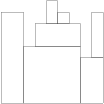

Write an efficient algorithm for the following assumptions:

N is an integer within the range [1..100,000];
each element of array H is an integer within the range [1..1,000,000,000].

In [36]:
H = [8,8,5,7,9,8,7,4,8]

In [55]:
stack = []  
count = 0
for x in H:
    # 현재 벽돌 높이가 이전 벽돌보다 작으면, 스택에서 제거
    while len(stack) != 0 and H[x-1] > x :
        stack.pop()
#         print(stack)
        
    # 현재 벽돌 높이가 이전보다 크면, 새로운 벽돌이 현재 위치에서 추가됨
    # 또는 현재 벽돌 높이와 이전 벽돌의 높이가 같으면 1개로 취급됨
    if len(stack)==0 or H[x-1] <x:
        stack.append(x)
        count +=1
        print(stack, count)
        

[8] 1
[8, 8] 2
[5] 3
[5, 9] 4
[5, 9, 8] 5
[4] 6
[4, 8] 7


빵점나와버림....?

In [42]:
def solution(H):
    stack = []  
    count = 0
    for x in H:
        # 현재 벽돌 높이가 이전 벽돌보다 작으면, 스택에서 제거
#         while len(stack) != 0 and H[x-1] > x :
        while len(stack) != 0 and stack[-1] > x:
            stack.pop()
            print(stack)

        # 현재 벽돌 높이가 이전보다 크면, 새로운 벽돌이 현재 위치에서 추가됨
        # 또는 현재 벽돌 높이와 이전 벽돌의 높이가 같으면 1개로 취급됨
        if len(stack)==0 or stack[-1] <x:
            stack.append(x)
            count +=1
    return count
        

In [43]:
solution(H)

[]
[5, 7]
[5, 7]
[5]
[]


7

https://app.codility.com/demo/results/trainingR5SA6B-4JA/

In [ ]:
# 참조
def solution(H):
    stack = []
    block_count = 0    # The number of needing blocks
    for height in H:
        while len(stack) != 0 and height < stack[-1]:
            # If the height of current block is less than
            #    the previous ones, the previous ones have
            #    to end before current point. They have no
            #    chance to exist in the remaining part.
            # So the previous blocks are completely finished.
            stack.pop()
            block_count += 1
        if len(stack) == 0 or height > stack[-1]:
            # If the height of current block is greater than
            #    the previous one, a new block is needed for
            #    current position.
            stack.append(height)
        # Else (the height of current block is same as that
        #    of previous one), they should be combined to
        #    one block.
    # Some blocks with different heights are still in the stack.
    block_count += len(stack)
    return block_count

In [63]:
stack = []
block_count = 0    # The number of needing blocks
for height in H:
    while len(stack) != 0 and height < stack[-1]:
        stack.pop()
        block_count += 1
#         print(stack, block_count)
#         print('-'*30)
    if len(stack) == 0 or height > stack[-1]:
        stack.append(height)
    print(stack, block_count)
#     block_count += len(stack)

[8] 0
[8] 0
[5] 1
[5, 7] 1
[5, 7, 9] 1
[5, 7, 8] 2
[5, 7] 3
[4] 5
[4, 8] 5
